In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-coupon-redemption/test.csv
/kaggle/input/predicting-coupon-redemption/Datasets columns explanation_.docx
/kaggle/input/predicting-coupon-redemption/train/coupon_item_mapping.csv
/kaggle/input/predicting-coupon-redemption/train/train.csv
/kaggle/input/predicting-coupon-redemption/train/customer_transaction_data.csv
/kaggle/input/predicting-coupon-redemption/train/customer_demographics.csv
/kaggle/input/predicting-coupon-redemption/train/item_data.csv
/kaggle/input/predicting-coupon-redemption/train/campaign_data.csv


In [2]:
import seaborn as sns

In [3]:
# Viewing training dataset
train_df=pd.read_csv('/kaggle/input/predicting-coupon-redemption/train/train.csv')
train_df

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0
...,...,...,...,...,...
78364,128587,8,71,1523,0
78365,128589,30,547,937,0
78366,128590,8,754,1004,0
78367,128592,13,134,71,0


In [4]:
#checking for null values in training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 78369 non-null  int64
 1   campaign_id        78369 non-null  int64
 2   coupon_id          78369 non-null  int64
 3   customer_id        78369 non-null  int64
 4   redemption_status  78369 non-null  int64
dtypes: int64(5)
memory usage: 3.0 MB


In [5]:
# Viewing test dataset
test_df=pd.read_csv('/kaggle/input/predicting-coupon-redemption/test.csv')
test_df

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811
...,...,...,...,...
50221,128584,20,843,501
50222,128588,25,415,481
50223,128591,25,596,1336
50224,128593,22,518,748


In [6]:
# checking for null values in test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50226 entries, 0 to 50225
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           50226 non-null  int64
 1   campaign_id  50226 non-null  int64
 2   coupon_id    50226 non-null  int64
 3   customer_id  50226 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


In [7]:
#Customer transaction dataset
cus_tsc_df=pd.read_csv('/kaggle/input/predicting-coupon-redemption/train/customer_transaction_data.csv')
cus_tsc_df

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0
...,...,...,...,...,...,...,...
1324561,2013-06-30,1129,2777,1,284.60,-71.24,0.0
1324562,2013-06-30,1129,2953,4,42.74,-28.50,0.0
1324563,2013-06-30,1129,2971,6,64.12,-42.74,0.0
1324564,2013-06-30,1129,46984,1,95.82,0.00,0.0


In [8]:
# checking for null values in customer demographics dataset
cus_tsc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   date             1324566 non-null  object 
 1   customer_id      1324566 non-null  int64  
 2   item_id          1324566 non-null  int64  
 3   quantity         1324566 non-null  int64  
 4   selling_price    1324566 non-null  float64
 5   other_discount   1324566 non-null  float64
 6   coupon_discount  1324566 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


In [9]:
cus_tsc_df=cus_tsc_df.sample(n=100000)
cus_tsc_df

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
991011,2013-03-01,1492,42140,1,101.16,0.00,0.0
68134,2012-03-22,1132,6871,1,95.82,-10.69,0.0
570911,2012-10-03,369,17880,1,89.05,-17.45,0.0
1046733,2013-03-22,829,22559,1,66.97,-21.73,0.0
784877,2012-12-17,231,35039,2,17.81,0.00,0.0
...,...,...,...,...,...,...,...
538435,2012-09-22,1555,22591,1,89.05,-17.45,0.0
1020134,2013-03-13,948,28880,2,17.81,0.00,0.0
1134911,2013-04-24,957,12013,2,227.26,0.00,0.0
547468,2012-09-26,619,55928,1,35.62,0.00,0.0


In [10]:
# merging train_df and cus_tsc_df
train_tsc_df=pd.merge(train_df,cus_tsc_df,left_on='customer_id',right_on='customer_id')

# merging test_df and cus_tsc_df
test_tsc_df=pd.merge(test_df, cus_tsc_df, left_on='customer_id',right_on='customer_id')


In [11]:
test_tsc_df=test_tsc_df.drop('date',axis=1)

In [12]:
test_tsc_df

,id,campaign_id,coupon_id,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,3,22,869,967,45359,1,106.50,-53.43,0.0
1,3,22,869,967,49913,1,53.43,-13.89,0.0
2,3,22,869,967,67202,1,213.36,0.00,0.0
3,3,22,869,967,36438,1,106.50,-35.62,0.0
4,3,22,869,967,15271,1,23.87,0.00,0.0
...,...,...,...,...,...,...,...,...,...
4624083,106228,24,43,710,4430,1,89.05,-6.06,0.0
4624084,106228,24,43,710,31372,1,35.62,-35.26,0.0
4624085,106228,24,43,710,41872,1,66.97,0.00,0.0
4624086,106228,24,43,710,46699,2,106.86,0.00,0.0


In [13]:
[i for i in train_tsc_df.columns]

['id',
 'campaign_id',
 'coupon_id',
 'customer_id',
 'redemption_status',
 'date',
 'item_id',
 'quantity',
 'selling_price',
 'other_discount',
 'coupon_discount']

In [14]:
# Training coupon redemption based on customer demographics dataset
# includes categorical data

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

X=train_tsc_df[['id',
 'campaign_id',
 'coupon_id',
 'customer_id',
 'item_id',
 'quantity',
 'selling_price',
 'other_discount',
 'coupon_discount']]

y=train_tsc_df['redemption_status']

model=RandomForestClassifier(n_estimators=10).fit(X,y)
cv_scores=cross_val_score(model,X,y,cv=10)

print('cross validation scores:',cv_scores,'\n','mean of cross validation scores:',np.mean(cv_scores))

cross validation scores: [0.98679393 0.98621213 0.9866923  0.98648252 0.98378493 0.98682833
 0.98653661 0.98544019 0.98530089 0.98589416] 
 mean of cross validation scores: 0.9859965988324524


Text(0.5, 1.0, 'Cross Validation Scores')

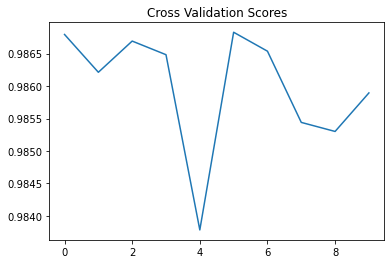

In [15]:
import matplotlib.pyplot as plt
sns.lineplot(np.arange(len(cv_scores)),cv_scores)
plt.gca().set_title('Cross Validation Scores')

In [16]:
predictions=model.predict(test_tsc_df)

In [17]:
sum([1 for i in predictions if i==1]), sum([1 for i in predictions if i==0])

(5254, 4618834)

Text(0.5, 1.0, 'Coupons Redeemed v/s Coupons not Redeemed: \n(0 - Coupon not redeemed, 1 - Coupon redeemed)')

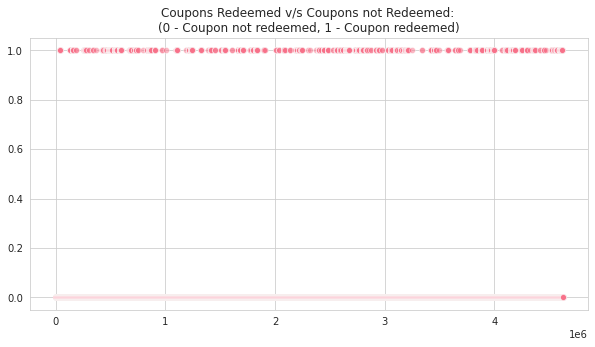

In [18]:
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.figure(figsize=(10,5))
sns.scatterplot(np.arange(len(predictions)),predictions,alpha=0.5)

plt.gca().set_title('Coupons Redeemed v/s Coupons not Redeemed: \n(0 - Coupon not redeemed, 1 - Coupon redeemed)')
